In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
file=['Home_theater.csv','router.csv',
       'Monitor.csv','mobile.csv','smart_watch.csv',
       'headphone.csv','laptop.csv',
       'Printer.csv','Professional_Camera.csv']
df0=pd.read_csv(file[0])
df1=pd.read_csv(file[1])
df2=pd.read_csv(file[2])
df3=pd.read_csv(file[3])
df4=pd.read_csv(file[4])
df5=pd.read_csv(file[5])
df6=pd.read_csv(file[6])
df7=pd.read_csv(file[7])
#df8=pd.read_csv(file[8])

df=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7],ignore_index=True)

df.head()

Reviews              Rating
0  \n\n  It is very very bad product. I am very d...  1.0 out of 5 stars
1  \n\n  It can use as home theatre,party purpose...  4.0 out of 5 stars
2  \n\n  I am writing this revuew after listening...  3.0 out of 5 stars
3  \n\n  Well writing this review after thoroughl...  5.0 out of 5 stars
4  \n\n  It's really good....value for money....!...  5.0 out of 5 stars

In [3]:
df.shape

(84258, 2)

In [4]:
df.isnull().sum()

Reviews    69
Rating      0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

Reviews              Rating
count            84189               84189
unique           56913                   5
top     \n\n  Good\n\n  5.0 out of 5 stars
freq              1416               36038

In [7]:
df['Rating'].value_counts()

5.0 out of 5 stars    36038
1.0 out of 5 stars    18584
4.0 out of 5 stars    16774
3.0 out of 5 stars     7928
2.0 out of 5 stars     4865
Name: Rating, dtype: int64

In [8]:
a=df[df['Rating']=='5.0 out of 5 stars']
b=df[df['Rating']=='4.0 out of 5 stars']
c=df[df['Rating']=='3.0 out of 5 stars']
d=df[df['Rating']=='2.0 out of 5 stars']
e=df[df['Rating']=='1.0 out of 5 stars']
print('Fraction of a,b,c,e to be sampled in the following respective ratios \n', len(d)/len(a), len(d)/len(b), len(d)/len(c), len(d)/len(e))


Fraction of a,b,c,e to be sampled in the following respective ratios 
 0.13499639269659802 0.2900321926791463 0.6136478304742684 0.26178433060697376


In [9]:
a_=a.sample(frac=0.14)
b_=b.sample(frac=0.30)
c_=c.sample(frac=0.62)
e_=e.sample(frac=0.27)


In [10]:
data=pd.concat([a_,b_,c_,d,e_],ignore_index=True)

In [11]:
data['Rating'].value_counts()

5.0 out of 5 stars    5045
4.0 out of 5 stars    5032
1.0 out of 5 stars    5018
3.0 out of 5 stars    4915
2.0 out of 5 stars    4865
Name: Rating, dtype: int64

In [12]:
data.head()

Reviews              Rating
0  \n\n  User-friendly awesome device I am very h...  5.0 out of 5 stars
1                                 \n\n  Its good\n\n  5.0 out of 5 stars
2  \n\n  Phone finder option to be included in th...  5.0 out of 5 stars
3  \n\n  I bought this for my growing boySuch a g...  5.0 out of 5 stars
4  \n\n  Tenda ac 10 is remotely accessable route...  5.0 out of 5 stars

In [13]:
data.shape

(24875, 2)

In [14]:
rating=[i.split('.')[0] for i in data['Rating']]

In [15]:
data['Rating']=rating

In [16]:
data.describe(include='all')

Reviews Rating
count            24875  24875
unique           20030      5
top     \n\n  Good\n\n      5
freq               339   5045

In [17]:
data.isnull().sum()

Reviews    0
Rating     0
dtype: int64

In [18]:
data['Review_length']=[len(i) for i in data['Reviews']]

In [19]:
data

Reviews Rating  Review_length
0      \n\n  User-friendly awesome device I am very h...      5             88
1                                     \n\n  Its good\n\n      5             14
2      \n\n  Phone finder option to be included in th...      5            146
3      \n\n  I bought this for my growing boySuch a g...      5            206
4      \n\n  Tenda ac 10 is remotely accessable route...      5            636
...                                                  ...    ...            ...
24870                       \n\n  Only remote broken\n\n      1             24
24871  \n\n  I bought this product last year and it c...      1            168
24872  \n\n  This printer is not working properly. No...      1            163
24873  \n\n  The cost of printing is very high. One p...      1             79
24874  \n\n  Highly regret buying this phone. 2 very ...      1            663

[24875 rows x 3 columns]

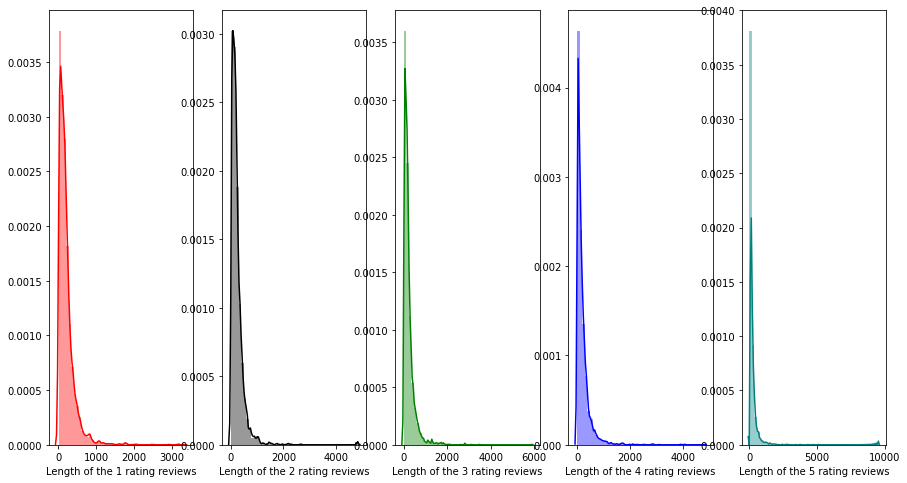

In [54]:
nu,li=plt.subplots(1,5,figsize = (15,8))
li[0]=sns.distplot(data['Review_length'][data['Rating']=='1'],
                   axlabel='Length of the 1 rating reviews',ax=li[0],color='red')
li[1]=sns.distplot(data['Review_length'][data['Rating']=='2'],
                   axlabel='Length of the 2 rating reviews',ax=li[1],color='black')
li[2]=sns.distplot(data['Review_length'][data['Rating']=='3'],
                   axlabel='Length of the 3 rating reviews',ax=li[2],color='green')
li[3]=sns.distplot(data['Review_length'][data['Rating']=='4'],
                   axlabel='Length of the 4 rating reviews',ax=li[3],color='blue')
li[4]=sns.distplot(data['Review_length'][data['Rating']=='5'],
                   axlabel='Length of the 5 rating reviews',ax=li[4],color='teal')
plt.show()

In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
from wordcloud import WordCloud

In [23]:
kkk=list(stopwords.words('english'))
for i in ['router','mobile','phone','one','also','even','give','good','use','product','monitor','monitor','home','theater','smart','watch','camera','printer','headphone','laptop']:
    kkk.append(i)

In [26]:
spams = data['Reviews'][data['Rating']=='5']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150,stopwords=kkk).generate(' '.join(spams))
print('\n'*3)
plt.figure(figsize=(10,8),facecolor='teal')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)


plt.show()

print('Wordcloud for five starred reviews.')
print('\n'*3)

Wordcloud for five starred reviews.






In [27]:
spams = data['Reviews'][data['Rating']=='4']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150,stopwords=kkk).generate(' '.join(spams))
print('\n'*3)
plt.figure(figsize=(10,8),facecolor='teal')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Wordcloud for four starred reviews.')
print('\n'*3)

Wordcloud for four starred reviews.






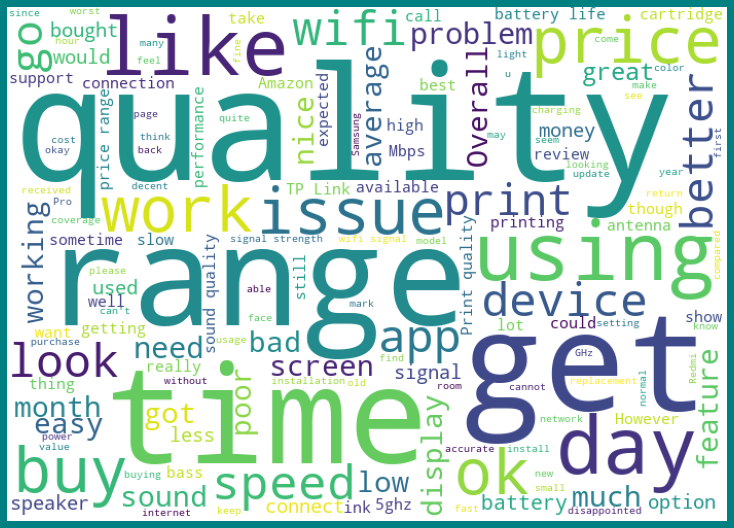

Wordcloud for three starred reviews.






In [28]:
spams = data['Reviews'][data['Rating']=='3']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150,stopwords=kkk).generate(' '.join(spams))

print('\n'*3)
plt.figure(figsize=(10,8),facecolor='teal')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Wordcloud for three starred reviews.')
print('\n'*3)

In [29]:
spams = data['Reviews'][data['Rating']=='2']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150,stopwords=kkk).generate(' '.join(spams))

print('\n'*3)
plt.figure(figsize=(10,8),facecolor='teal')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Wordcloud for two starred reviews.')
print('\n'*3)

Wordcloud for two starred reviews.






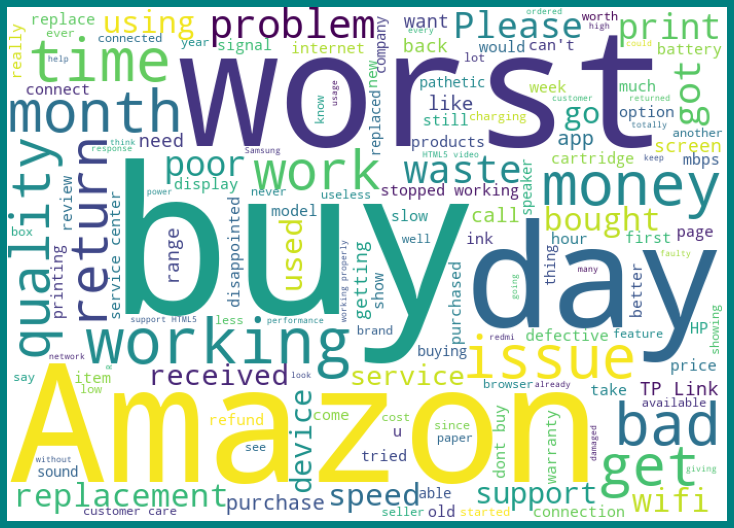

Wordcloud for one starred reviews.






In [30]:
spams = data['Reviews'][data['Rating']=='1']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150,stopwords=kkk).generate(' '.join(spams))

print('\n'*3)
plt.figure(figsize=(10,8),facecolor='teal')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Wordcloud for one starred reviews.')
print('\n'*3)

In [42]:
kkk.remove('not')

In [43]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [44]:
ll=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 
    'only', 'own', 'same', 'so', 'than' 's', 't', 'can', 'will', 'just', 'don', "don't", 
    'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
    'ma']

In [45]:
corpus=[]
for i in range(len(data)):
    r=re.sub('[^a-zA-Z0-9]',' ',data['Reviews'][i])
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in kkk]
    r=' '.join(r)
    corpus.append(r)
    #print(i)

In [46]:
corpus

['user friendly awesome device happy print quality connectivity superb',
 '',
 'finder option included next update helpfulscreen size could designed little broader elegant look',
 'bought growing boysuch health band son got motive complete target 10000 step monitoring heart rate sleep tracking superb touch screen experience',
 'tenda ac 10 remotely accessable app installation easy app best price dual bandworks excellently feature r soo satisfaction range penetration powerful security powerfulit 4 month running smoothly without hesitation lag 5 ghz range long thier heating give speed isp provide u anyone searching router office suggest ac10 u 100 guaranteed satisfaction parental control give u control client parent thier child',
 '',
 'great love feature look',
 'easy install wifi singal',
 'got r 5900 sale awesome stunning colour great buy loving',
 'super',
 '',
 'best using noise',
 'hp 2131 personnel printing copying work share grand childen thier school totally love function',
 'go

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdfV=TfidfVectorizer(max_features=1800)
x=TfIdfV.fit_transform(corpus).toarray()

In [48]:
y=data['Rating']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,f1_score,log_loss

MNB=MultinomialNB()
DTC=DecisionTreeClassifier()
SVMR=SVC()
KNN=KNeighborsClassifier()
LR=LogisticRegression(max_iter=1000)
rf=RandomForestClassifier()
models=[DTC,KNN,LR,rf]


In [51]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('---'*15)
    print(model)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    #print(f1_score(y_test,y_pred))
    #print(log_loss(y_test,y_pred))

---------------------------------------------
DecisionTreeClassifier()
[[290 101  64  34  21]
 [ 69 289  72  37  17]
 [ 61  78 234  48  66]
 [ 44  46  70 194 177]
 [ 19  21  46 106 284]]
              precision    recall  f1-score   support

           1       0.60      0.57      0.58       510
           2       0.54      0.60      0.57       484
           3       0.48      0.48      0.48       487
           4       0.46      0.37      0.41       531
           5       0.50      0.60      0.55       476

    accuracy                           0.52      2488
   macro avg       0.52      0.52      0.52      2488
weighted avg       0.52      0.52      0.52      2488

---------------------------------------------
KNeighborsClassifier()
[[122  36  57 169 126]
 [ 52 125  48 144 115]
 [ 44  38 142 139 124]
 [ 28  29  59 221 194]
 [ 13  10  36 161 256]]
              precision    recall  f1-score   support

           1       0.47      0.24      0.32       510
           2       0.53      0

In [53]:
yy=[1 if i in ['5','4','3'] else 0 for i in y]
X_train,X_test,y_train,y_test=train_test_split(x,yy,test_size=0.10)
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('---'*15)
    print(model)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


---------------------------------------------
DecisionTreeClassifier()
[[ 750  238]
 [ 268 1232]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       988
           1       0.84      0.82      0.83      1500

    accuracy                           0.80      2488
   macro avg       0.79      0.79      0.79      2488
weighted avg       0.80      0.80      0.80      2488

---------------------------------------------
KNeighborsClassifier()
[[ 248  740]
 [ 101 1399]]
              precision    recall  f1-score   support

           0       0.71      0.25      0.37       988
           1       0.65      0.93      0.77      1500

    accuracy                           0.66      2488
   macro avg       0.68      0.59      0.57      2488
weighted avg       0.68      0.66      0.61      2488

---------------------------------------------
LogisticRegression(max_iter=1000)
[[ 720  268]
 [ 204 1296]]
              precision    recall  f1-score  